In [2]:
import os


In [3]:
# loop_path = "/scratch/eschreib/results_full_run/coo_opt_loop_unrolled_SDDMM_GPU/1000x1000/results_1703089364646029558.csv"
# vec_path = "/scratch/eschreib/results_full_run/coo_opt_vectorization_SDDMM_GPU/1000x1000/results_1703025504244038788.csv"
# naive_path = "/scratch/eschreib/results_full_run/naive_coo_SDDMM_GPU/1000x1000/results_1702818428438043999.csv"

loop_path = "/scratch/eschreib/results_full_run/coo_opt_loop_unrolled_SDDMM_GPU/10000x10000/results_1703089370690223472.csv"
vec_path = "/scratch/eschreib/results_full_run/coo_opt_vectorization_SDDMM_GPU/10000x10000/results_1703025510178564224.csv"
naive_path = "/scratch/eschreib/results_full_run/naive_coo_SDDMM_GPU/10000x10000/results_1702823332722624781.csv"


In [4]:
# Both files are csv with the following columns:
# function, SparseFormat, path/to/first/dense/matrix, path/to/second/dense/matrix, path/to/first/sparse/matrix, result[0], result[1], ..., result[n]

# load as list of lists, drop last item (empty line)
loop = []
with open(loop_path, 'r') as f:
    for line in f:
        loop.append(line.strip().split(',')[0:-1])
vec = []
with open(vec_path, 'r') as f:
    for line in f:
        vec.append(line.strip().split(',')[0:-1])
naive = []
with open(naive_path, 'r') as f:
    for line in f:
        naive.append(line.strip().split(',')[0:-1])
# remove header
loop = loop[1:]
vec = vec[1:]
naive = naive[1:]


In [5]:
# for each row drop the first 20 results (warmup) and compute the mean of the remaining results, and std without assuming normality
import numpy as np
import scipy.stats as stats

loop_mean = []
loop_std = []
for row in loop:
    loop_mean.append([row[0], row[1], row[2], row[3], sum([float(x) for x in row[24:]])/len(row[24:])])
    loop_std.append([row[0], row[1], row[2], row[3], stats.sem([float(x) for x in row[24:]])])
vec_mean = []
vec_std = []
for row in vec:
    vec_mean.append([row[0], row[1], row[2], row[3], sum([float(x) for x in row[24:]])/len(row[24:])])
    vec_std.append([row[0], row[1], row[2], row[3], stats.sem([float(x) for x in row[24:]])])
naive_mean = []
naive_std = []
for row in naive:
    naive_mean.append([row[0], row[1], row[2], row[3], sum([float(x) for x in row[24:]])/len(row[24:])])
    naive_std.append([row[0], row[1], row[2], row[3], stats.sem([float(x) for x in row[24:]])])

print(loop_mean)
print(loop_std)
print(vec_mean)
print(vec_std)
print(naive_mean)
print(naive_std)

[['coo_opt_loop_unrolled_SDDMM_GPU', '/scratch/eschreib/matrices/Dataset_generated_matrices/10000x10000/n_10000_m_10000_sparsity_1', '/scratch/eschreib/matrices/Dataset_generated_matrices/10000x10000/n_10000_m_10000_sparsity_1', '/scratch/eschreib/matrices/Dataset_generated_matrices/10000x10000/n_10000_m_10000_sparsity_000001.mtx', 15390382.094383366], ['coo_opt_loop_unrolled_SDDMM_GPU', '/scratch/eschreib/matrices/Dataset_generated_matrices/10000x10000/n_10000_m_10000_sparsity_1', '/scratch/eschreib/matrices/Dataset_generated_matrices/10000x10000/n_10000_m_10000_sparsity_1', '/scratch/eschreib/matrices/Dataset_generated_matrices/10000x10000/n_10000_m_10000_sparsity_00001.mtx', 17994147.891998187], ['coo_opt_loop_unrolled_SDDMM_GPU', '/scratch/eschreib/matrices/Dataset_generated_matrices/10000x10000/n_10000_m_10000_sparsity_1', '/scratch/eschreib/matrices/Dataset_generated_matrices/10000x10000/n_10000_m_10000_sparsity_1', '/scratch/eschreib/matrices/Dataset_generated_matrices/10000x100

In [16]:
# make pandas dataframe from naive_mean, loop and vec   
import pandas as pd
df_loop = pd.DataFrame(loop, columns=['function',  'path/to/first/dense/matrix', 'path/to/second/dense/matrix', 'path/to/first/sparse/matrix'] + ['result' + str(i) for i in range(len(loop[0])-4)])
df_vec = pd.DataFrame(vec, columns=['function', 'path/to/first/dense/matrix', 'path/to/second/dense/matrix', 'path/to/first/sparse/matrix'] + ['result' + str(i) for i in range(len(vec[0])-4)])
df_naive_mean = pd.DataFrame(naive_mean, columns=['function', 'path/to/first/dense/matrix', 'path/to/second/dense/matrix', 'path/to/first/sparse/matrix', 'mean'])

In [17]:
# merge loop and vec on the first 4 columns
df = pd.merge(df_loop, df_vec, on=['path/to/first/sparse/matrix'], suffixes=('_loop', '_vec'))
# merge with naive_mean
df = pd.merge(df, df_naive_mean, on=['path/to/first/sparse/matrix'], suffixes=('', '_naive'))

In [22]:
df

,path/to/first/sparse/matrix,result0_loop,result1_loop,result2_loop,result3_loop,result4_loop,result5_loop,result6_loop,result7_loop,result8_loop,...,result211_vec,result212_vec,result213_vec,result214_vec,result215_vec,result216_vec,result217_vec,result218_vec,result219_vec,mean
0,/scratch/eschreib/matrices/Dataset_generated_m...,15419391.632080,15392767.906189,15383551.597595,15394816.398621,15399935.722351,15371264.457703,15377408.027649,15396863.937378,15379455.566406,...,8507391.929626,8504320.144653,8511487.960815,8518655.776978,8498175.621033,8509440.422058,8503295.898438,8504320.144653,8508416.175842,1.545979e+07
1,/scratch/eschreib/matrices/Dataset_generated_m...,18022399.902344,17982463.836670,18012159.347534,17991680.145264,17997823.715210,17991680.145264,17982463.836670,17985536.575317,18006015.777588,...,8080384.254456,8083456.039429,8095744.132996,8077312.469482,8080384.254456,8089599.609375,8070143.699646,8075263.977051,8084480.285645,1.499513e+07
2,/scratch/eschreib/matrices/Dataset_generated_m...,37785343.170166,37827583.312988,37803009.033203,37791744.232178,37836799.621582,37809150.695801,37798912.048340,37819393.157959,37814273.834229,...,25772031.784058,25741312.026978,25765888.214111,25756671.905518,25769983.291626,25773056.030273,25760768.890381,25760768.890381,25750528.335571,3.715681e+07
3,/scratch/eschreib/matrices/Dataset_generated_m...,67649185.180664,67580924.987793,67591171.264648,67684349.060059,67647491.455078,67747840.881348,67703811.645508,67600387.573242,67717117.309570,...,51758079.528809,51746814.727783,51777534.484863,51765247.344971,51765247.344971,51782657.623291,51820545.196533,51801086.425781,51672065.734863,6.708562e+07
4,/scratch/eschreib/matrices/Dataset_generated_m...,617323852.539062,619478027.343750,612733947.753906,615365661.621094,611675109.863281,615388183.593750,620955627.441406,617562133.789062,622535705.566406,...,524980224.609375,523518981.933594,523953125.000000,530499572.753906,523041809.082031,527604736.328125,522921997.070312,526361572.265625,525097961.425781,6.246519e+08
5,/scratch/eschreib/matrices/Dataset_generated_m...,1239345581.054688,1245936645.507812,1239829467.773438,1241123779.296875,1234753540.039062,1240670166.015625,1243379760.742188,1233268676.757812,1237524536.132812,...,1068431396.484375,1063163940.429688,1070142456.054688,1054128173.828125,1053213745.117188,1057806396.484375,1076442138.671875,1060810791.015625,1064654907.226562,1.261822e+09


In [25]:
# drop all columns function_loop, function_vec, function, path/to/first/dense/matrix_loop, path/to/first/dense/matrix_vec, path/to/second/dense/matrix_loop, path/to/second/dense/matrix_vec, path/to/first/dense/matrix, path/to/second/dense/matrix
# df = df.drop(['function_loop', 'function_vec', 'function', 'path/to/first/dense/matrix_loop', 'path/to/first/dense/matrix_vec', 'path/to/second/dense/matrix_loop', 'path/to/second/dense/matrix_vec', 'path/to/first/dense/matrix', 'path/to/second/dense/matrix'], axis=1)
#convert all cols except path/to/first/sparse/matrix to float
df.iloc[:,1:] = df.iloc[:,1:].astype(float)
# from each result remove the mean of the naive
for i in range(1, len(df.columns)-1):
    df.iloc[:,i] = (df.iloc[:,i] - df.iloc[:,-1]) / df.iloc[:,-1] * 100 


In [29]:
# make a seaborn bar plot with the mean and std of the results
import seaborn as sns
import matplotlib.pyplot as plt

# get all resultX_loop columns and the first
data_loop = df.filter(regex='_loop$', axis=1)
data_loop = pd.concat([df.iloc[:,0], data_loop], axis=1)

# get all resultX_vec columns and the first
data_vec = df.filter(regex='_vec$', axis=1)
data_vec = pd.concat([df.iloc[:,0], data_vec], axis=1)


In [39]:
# make cols from the rows and rows from the cols
data_loop = data_loop.transpose()

In [73]:
for value in  data_loop["path/to/first/sparse/matrix"].values:
    print(value.split('/')[-1])

n_10000_m_10000_sparsity_000001.mtx
n_10000_m_10000_sparsity_00001.mtx
n_10000_m_10000_sparsity_00005.mtx
n_10000_m_10000_sparsity_0001.mtx
n_10000_m_10000_sparsity_0005.mtx
n_10000_m_10000_sparsity_001.mtx


In [54]:
# mean of each row  except the first
data_loop_mean = data_loop.iloc[:, 1:].mean(axis=1)
data_vec_mean = data_vec.iloc[:, 1:].mean(axis=1)

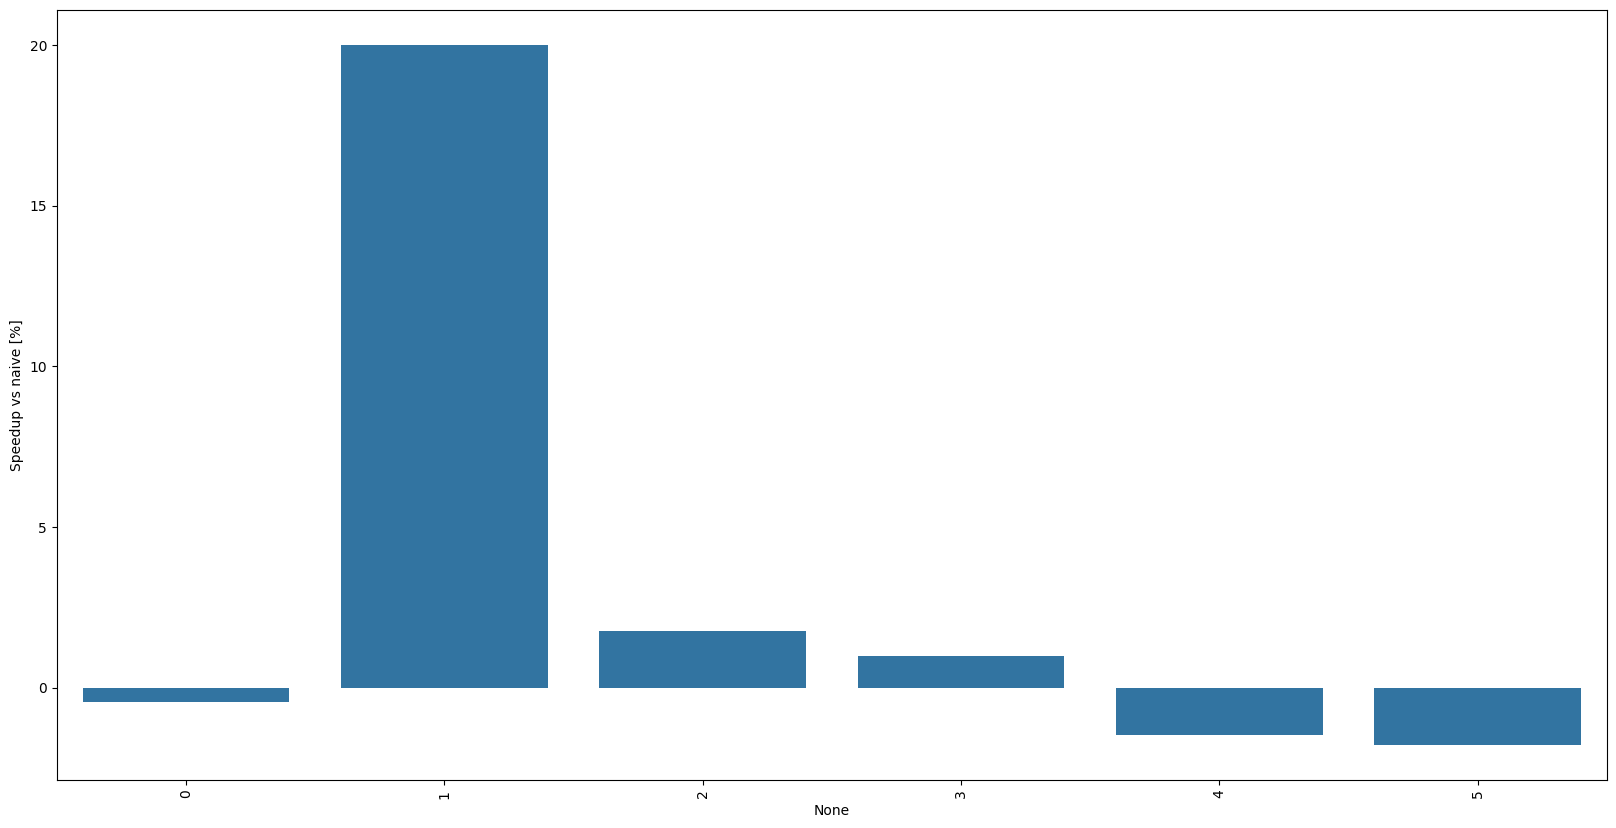

In [53]:
# plot the mean of all columns of a row. Each row is a new bar with name in the first column
plt.figure(figsize=(20,10))
sns.barplot(x=data_loop_mean.index, y=data_loop_mean.values, estimator='median', errorbar=('ci',98))
plt.xticks(rotation=90)
plt.ylabel('Speedup loop vs naive [%]')

plt.show()



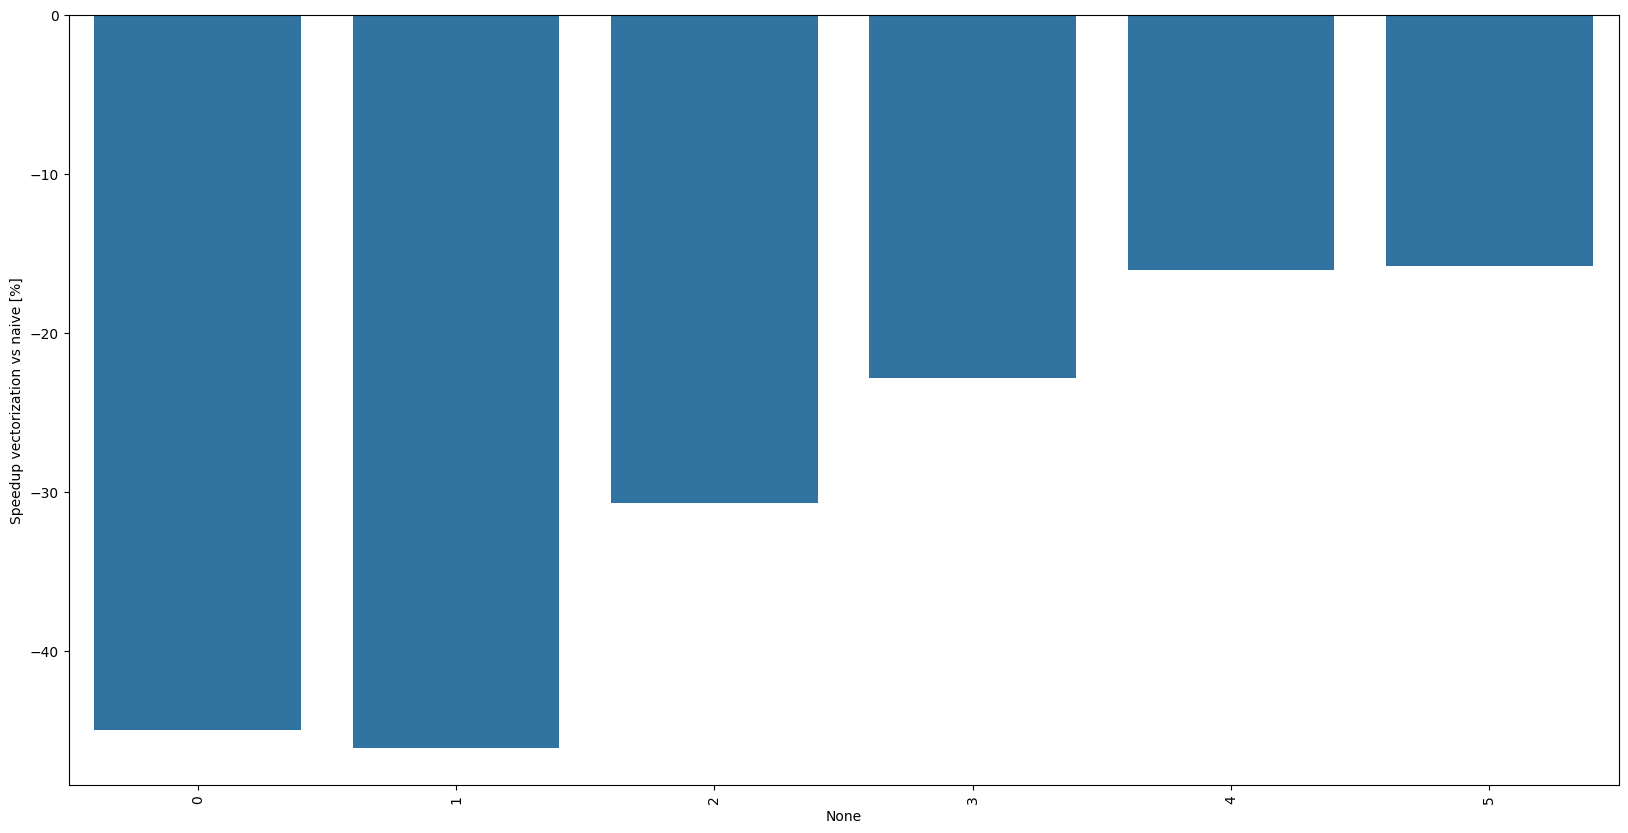

In [55]:
# plot the same for vec
plt.figure(figsize=(20,10))
sns.barplot(x=data_vec_mean.index, y=data_vec_mean.values, estimator='median', errorbar=('ci',98))
plt.xticks(rotation=90)
plt.ylabel('Speedup vectorization vs naive [%]')
plt.show()


In [56]:
# convert to pandas dataframe
import pandas as pd
loop_mean_df = pd.DataFrame(loop_mean, columns=['function', 'SparseFormat', 'path/to/first/dense/matrix', 'path/to/second/dense/matrix', 'mean'])
vec_mean_df = pd.DataFrame(vec_mean, columns=['function', 'SparseFormat', 'path/to/first/dense/matrix', 'path/to/second/dense/matrix', 'mean'])
naive_mean_df = pd.DataFrame(naive_mean, columns=['function', 'SparseFormat', 'path/to/first/dense/matrix', 'path/to/second/dense/matrix', 'mean'])

loop_std_df = pd.DataFrame(loop_std, columns=['function', 'SparseFormat', 'path/to/first/dense/matrix', 'path/to/second/dense/matrix', 'std'])
vec_std_df = pd.DataFrame(vec_std, columns=['function', 'SparseFormat', 'path/to/first/dense/matrix', 'path/to/second/dense/matrix', 'std'])
naive_std_df = pd.DataFrame(naive_std, columns=['function', 'SparseFormat', 'path/to/first/dense/matrix', 'path/to/second/dense/matrix', 'std'])

# merge mean and std
loop_df = pd.merge(loop_mean_df, loop_std_df, on=['path/to/second/dense/matrix'])[['path/to/second/dense/matrix', 'std' , 'mean']]
vec_df = pd.merge(vec_mean_df, vec_std_df, on=['path/to/second/dense/matrix'])[['path/to/second/dense/matrix', 'std' , 'mean']]
naive_df = pd.merge(naive_mean_df, naive_std_df, on=['path/to/second/dense/matrix'])[['path/to/second/dense/matrix', 'std' , 'mean']]


In [57]:
# merge dataframes on path/to/second/dense/matrix
merged = loop_df.merge(vec_df, on=['path/to/second/dense/matrix'], suffixes=('_loop', '_vec'))
merged = merged.merge(naive_df, on=['path/to/second/dense/matrix'], suffixes=('_merged', '_naive'))
# rename mean to mean_naive
merged = merged.rename(columns={'mean': 'mean_naive'})
merged = merged.rename(columns={'std': 'std_naive'})

# drop all cols except mean
merged = merged[['mean_loop', 'mean_vec', 'mean_naive', 'std_loop', 'std_vec', 'std_naive']]


In [58]:
# calculate the speedup of loop over naive and vec over naive
merged['speedup_loop'] = (1 /( merged['mean_naive'] / merged['mean_loop'] )) *100
merged['speedup_vec'] = (1 / (merged['mean_naive'] / merged['mean_vec'])) * 100

# calculate the standard error of the speedup
merged['std_error_loop'] = merged['speedup_loop'] * np.sqrt((merged['std_loop']/merged['mean_loop'])**2 + (merged['std_naive']/merged['mean_naive'])**2)
merged['std_error_vec'] = merged['speedup_vec'] * np.sqrt((merged['std_vec']/merged['mean_vec'])**2 + (merged['std_naive']/merged['mean_naive'])**2)


In [59]:
merged

,mean_loop,mean_vec,mean_naive,std_loop,std_vec,std_naive,speedup_loop,speedup_vec,std_error_loop,std_error_vec
0,1.539038e+07,8.505815e+06,1.545979e+07,521.389107,402.847588,503.269674,99.551017,55.018942,0.004677,0.003162
1,1.799415e+07,8.081116e+06,1.499513e+07,629.870197,450.541809,785.267457,119.999960,53.891611,0.007559,0.004122
2,3.781556e+07,2.576324e+07,3.715681e+07,1954.318929,1266.949903,1751.525407,101.772876,69.336506,0.007119,0.004723
3,6.775151e+07,5.175373e+07,6.708562e+07,27413.026956,2806.651671,3715.995185,100.992593,77.145780,0.041244,0.005980
4,6.154201e+08,5.246228e+08,6.246519e+08,280356.465595,185794.532603,207347.269585,98.522088,83.986414,0.055533,0.040766
5,1.239303e+09,1.062897e+09,1.261822e+09,441867.945554,663497.301363,433077.164186,98.215371,84.235113,0.048606,0.060006


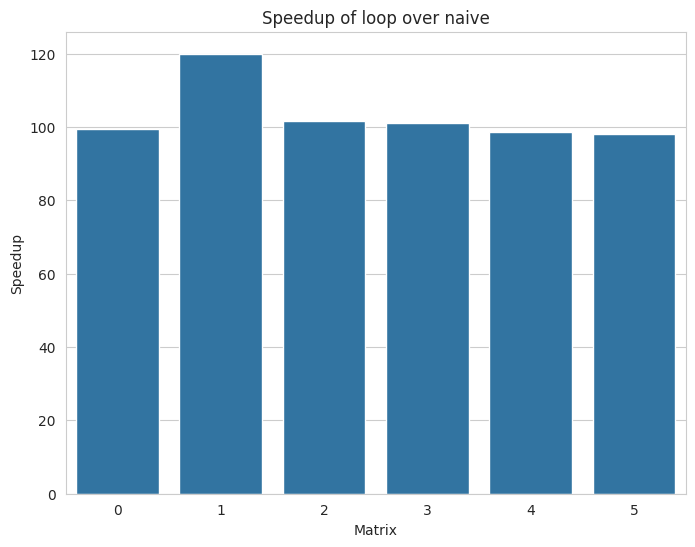

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# plot the speedup of loop over naive 
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
data = merged[['speedup_loop', 'std_error_loop']]
data.columns = ['speedup', 'std_error']
sns.barplot(x=data.index, y='speedup', data=data)
plt.title("Speedup of loop over naive")
plt.xlabel("Matrix")
plt.ylabel("Speedup")
plt.show()



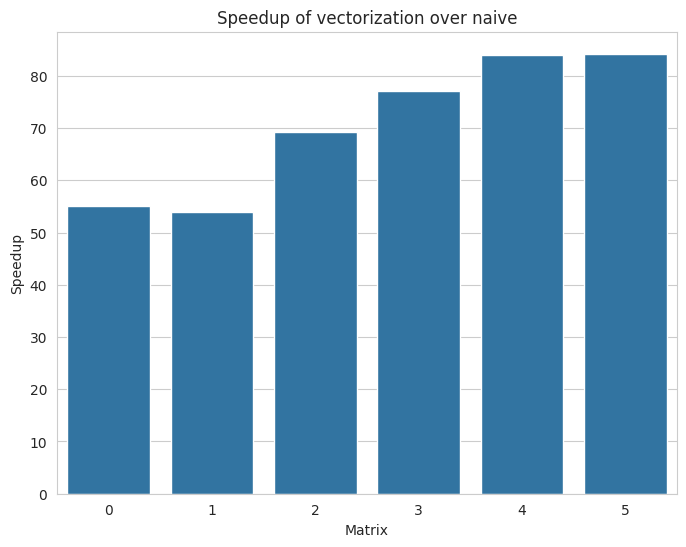

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# plot the speedup of loop over naive 
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
data = merged[['speedup_vec', 'std_error_vec']]
data.columns = ['speedup', 'std_error']
sns.barplot(x=data.index, y='speedup', data=data)
plt.title("Speedup of vectorization over naive")
plt.xlabel("Matrix")
plt.ylabel("Speedup")
plt.show()

/tmp/ipykernel_916030/1790290298.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.index, y='speedup_loop', data=data, color='blue', label='loop', palette='muted')
/tmp/ipykernel_916030/1790290298.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.index, y='speedup_vec', data=data, color='red', label='vectorization', palette='bright')


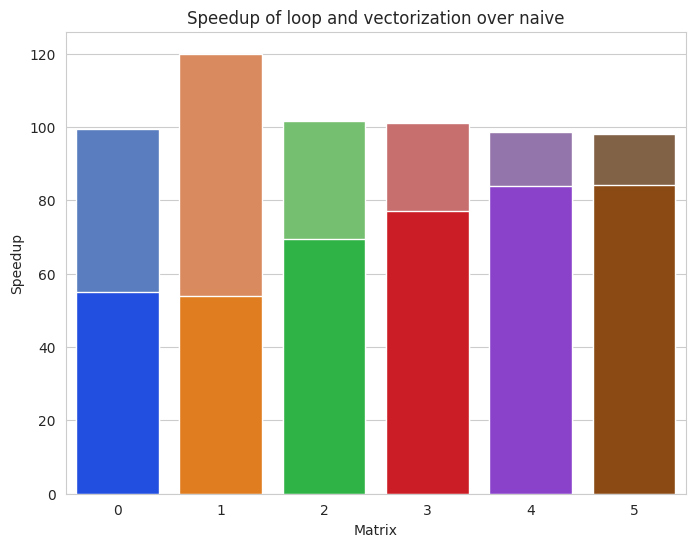

In [69]:
# combine both plots and stack each bar next to each other
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
data = merged[['speedup_loop', 'speedup_vec', 'std_error_loop', 'std_error_vec']]
sns.barplot(x=data.index, y='speedup_loop', data=data, color='blue', label='loop', palette='muted')
sns.barplot(x=data.index, y='speedup_vec', data=data, color='red', label='vectorization', palette='bright')
plt.title("Speedup of loop and vectorization over naive")
plt.xlabel("Matrix")
plt.ylabel("Speedup")
plt.show()